<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι & Επιδημιολογικά Μοντέλα</h3>
<p style=text-align:justify>Στην παρούσα άσκηση εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους συμβατικούς αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση. Τέλος θα εξοικειωθείτε με τα βασικά επιδημιολογικά μοντέλα SIR, SIS..</p>

In [184]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy.integrate import odeint

import random
import pprint #pretty print

## ΜΕΡΟΣ Α

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.

Η προφανής βέλτιστη λύση της δυαδικής ακολουθίας $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$, είναι

$ x_i = 1, \forall i \in \{0,1,...,n\}$.

In [185]:
def list2d(d1,d2,init_value = 0):
    #lst[d1][d2][d3] = new_value
    lst = [ [init_value for t2 in range(d2)] for t1 in range(d1)]
    return lst


def list3d(d1,d2,d3,init_value = 0):
    #lst[d1][d2][d3] = new_value
    lst = [[ [init_value for t3 in range(d3)] for t2 in range(d2)] for t1 in range(d1)]
    return lst


In [186]:
def create_population(bits=20, chrom=10): # bits = # of bits per chromosome, chrom = # of chromosomes per population 
    # Create the initial population
    b0 = [ [random.randint(0, 1) for t2 in range(bits)] for t1 in range(chrom)]          
    return(b0)


def find_fitness(chromosome):
    # Calculate fitness of chromosomes
    bits = len(chromosome)
    return( sum(chromosome) / bits ) # diairoume gia na einai kanonikopoihmenh sto 1


def proportional_selection(population): # SNA_Lecture_08 sel 11/29
    # Select chromosomes to pass to next population proportionally to their fitness
    
    # population[i] == chromosome_i
    parents = []
    chrom = len(population)
    
    popsum = 0
    for c in range(chrom): # we create a new population
        popsum = popsum + find_fitness( population[c] )
        
        
    for c in range(chrom):
        pick = random.uniform(0, 1)
        count = 0
        
        sum1 = find_fitness( population[count] ) / popsum
        while(count < chrom -1 and pick > sum1 ):
            count = count + 1
            sum1  = sum1 + find_fitness( population[count] ) / popsum

        parents.append(population[count]) # chromosome to be chosen as a parent
    return(parents)
        
    

def crossover(population, prob = 0.3):
    # Apply crossover to population
    bits = len(population[0]) # number of bits in chromosome
    chrom = len(population) # number of chromosomes in population
    
    for c in range(0,chrom-1):
        if (prob > random.uniform(0, 1)): # one-point crosover as described in SNA_Lecture_08 sel 13/29
            pos = random.randint(1, bits - 1 ) 
            for k in range(pos, bits): 
                temp = population[c][k] # bit swap
                population[c][k] = population[c+1][k]
                population[c+1][k] = temp
    
    return(population)
            

def mutation(population, prob = 0.01):
    # Apply mutation to population
    bits = len(population[0])
    m = len(population) # number of chromosomes in population
    
    for c in range(0,m-1):
        for k in range(0, n): 
            if (prob > random.uniform(0, 1)): # mutation as described in SNA_Lecture_08 sel 13/29
                if population[c][k] == 0: # bit change
                    population[c][k] = 1
                else:
                    population[c][k] = 0
    
    return(population)


def genetic_algorithm(chrom, cross_prob, mut_prob):
    # Main genetic algorithm
    pop = create_population(chrom = chrom)
    
    totsum = 0
    for c in range(chrom):
        totsum = totsum + find_fitness(pop[c])
    init_pop_fitness = totsum / chrom
    
    pop = proportional_selection(pop)
    pop = crossover(pop, cross_prob)
    pop = mutation(pop, mut_prob)
    
    totsum = 0
    for c in range(chrom):
        totsum = totsum + find_fitness(pop[c])
    
    pop_fitness = totsum / chrom
    
    if fitn_percentage == False:    
        return(pop_fitness)
    else:
        return((pop_fitness - init_pop_fitness) / init_pop_fitness)

    

In [187]:
fitn_percentage = False
if fitn_percentage == False:
    msg = "Fitness"
else:
    msg= "Improvement Percentage of Fitness"

#### Ας υπολογίσουμε μερικές ενδεικτικές περιπτώσεις για καλύτερη κατανόηση και απεικόνιση.

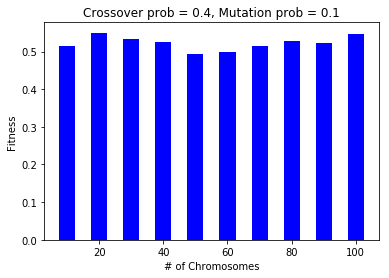

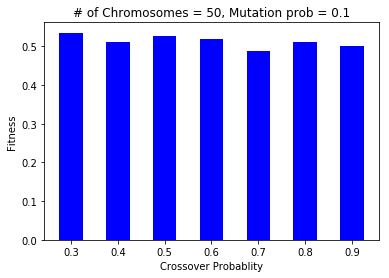

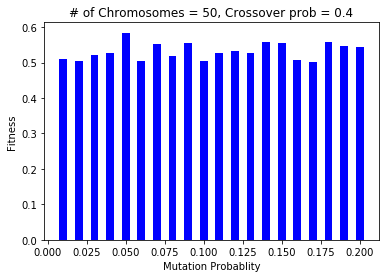

In [190]:
chromosome_range = range(10,101,10)
crossover_prob_range = np.arange(0.3, 0.91, 0.1)
mutation_prob_range = np.arange(0.01, 0.201, 0.01)


res1 = []
cp = 0.4
mp = 0.1
for c in chromosome_range:
    res1.append( genetic_algorithm(c,cp , mp ) )

plt.bar(list(chromosome_range),res1, width=5, color='b')
plt.title("Crossover prob = %.1f, Mutation prob = %.1f" %(cp, mp))
plt.ylabel(msg)
plt.xlabel("# of Chromosomes")
plt.show()



res2 = []
c = 50
mp = 0.1
for cp in crossover_prob_range:
    res2.append( genetic_algorithm(c,cp , mp ) )

plt.bar(list(crossover_prob_range),res2, width=0.05, color='b')
plt.title("# of Chromosomes = %d, Mutation prob = %.1f" %(c, mp))
plt.ylabel(msg)
plt.xlabel("Crossover Probablity")
plt.show()


res3 = []
c = 50
cp = 0.4
for mp in mutation_prob_range:
    res3.append( genetic_algorithm(c,cp , mp ) )

plt.bar(list(mutation_prob_range),res3, width=0.005, color='b')
plt.title("# of Chromosomes = %d, Crossover prob = %.1f" %(c, cp))
plt.ylabel(msg)
plt.xlabel("Mutation Probablity")
plt.show()

#### Θα υπολογίσουμε όλες τις δυνατές περιπτώσεις και θα βρούμε αυτή με τη μεγαλύτερη ποσοστιαία βελτίωση της fitness

In [6]:
# values
chromosome_range = range(10,101,10)
cross_prob_range = np.arange(0.3, 0.91, 0.1)
mutation_prob_range = np.arange(0.01, 0.201, 0.01)


res_data = []
res_fitn = []
max_fitn = 0
for c in chromosome_range:
    for cross_prob in cross_prob_range:
        for mut_prob in mutation_prob_range:
            fitn = genetic_algorithm(c, cross_prob, mut_prob)            
#             temp_row = [c, cross_prob, mut_prob, fitn]            
#             res_data.append(temp_row)
#             res_fitn.append(fitn)
            
            if max_fitn < fitn:
                max_fitn = fitn
                max_chrom = c
                max_cross_prob = cross_prob
                max_mut_prob = mut_prob
                
print("Maximum",msg,"achieved = %f, for:" %max_fitn )
print("    - # of chromosomes =", max_chrom)
print("    - Crossover probability =", max_cross_prob)
print("    - Mutation probability =", max_mut_prob)

Maximum Fitness achieved = 0.640000, for:
    - # of chromosomes = 10
    - Crossover probability = 0.8000000000000003
    - Mutation probability = 0.060000000000000005


In [7]:
# 4d plot

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x = range(100)
# y = range(100)
# z = range(100)
# c = range(100)

# ax.scatter(x, y, z, c=c, cmap=plt.hot())
# plt.show()

### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.

##### Αρχικοποίηση
Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.

##### Συνάρτηση Fitness
Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.

##### Επιλογή (Selection)
Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό,
δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.

##### Διασταύρωση (Crossover)
Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.

##### Μετάλλαξη (Mutation)
Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.

##### Κριτήριο Τερματισμού (Stopping Criterion)
Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.


In [8]:
### ATTENTION don't change because the variables are used in the given code
### of course you don't have to use the converted graph if you don't want to

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [9]:
def neighbors_node(G, node):
    edg = G.edges(node)
    edg = list(edg)
    neigh = []
    for i in range(len(edg)):
        neigh.append(edg[i][1])
        
    return(neigh)

def neighbors_all(G):
    n = len(G.nodes)
    res = []
    for node in range(n):
        neigh = neighbors_node(G,node)
        res.append(neigh)
    return(res)

In [10]:
def create_population(G, chrom): # chrom = # of chromosomes per population  
    # Create the initial population
    
    #n = # of nodes of graph = bits = # of bits per chromosome
    n =  len(G.nodes)
    neigh = neighbors_all(G)
    
    b_t0 = list2d(chrom,n)    
    for c in range(chrom):
        for node in range(n): #node = bit
            x = random.randint(0, len(neigh[node]) -1)
            rand_neigh = neigh[node][x]
            b_t0[c][node] = rand_neigh    
    
    return(b_t0) #population




# # Construct the communities from the (index->value) pairs of the chromosome with the highest fitness value
# final_edges = []
# for i,b_i in enumerate(chromosome):
#     final_edges.append((i,b_i))

# final_graph = nx.Graph()
# final_graph.add_edges_from(final_edges)
# subgraphs = nx.connected_component_subgraphs(final_graph)

# partition = []
# for com in subgraphs:
#     partition.append(list(com.nodes()))

def find_communities(chromosome): 
    
    #============================================================================
    def add_neighbors(node): 
        nonlocal temp_com
        nonlocal chromosome
        nonlocal unused
        nonlocal used
        nonlocal n
                  
        for i in range(n):
            if node == chromosome[i] and used[i] == 0:
                temp_com.append(i)
                unused.append(i)
    #==============================================================================

    n = len(chromosome) # n = # of nodes or # of bits per chromosome
    
    communities = [] 
    com_count = 0
    used = [0 for i in range(n)] # list of examined nodes
    
    # Find communities
    while sum(used) < n: # when sum(used) == n we stop because we examined all of the nodes
        # New community
        temp_com = []
        unused = [] # list of unexamined nodes
        nd = 0
        flag = 0
        while nd<n and flag == 0:
            if used[nd] == 0:
                first_unused = nd
                flag = 1
            nd = nd + 1
        unused.append(first_unused) # initialization: first unused node is first to be examined

        temp_com.append(unused[0]) # we put the first unexamined node in the community
        while len(unused)>0: # when len(unused)==0 we will have examined all of the nodes of that community !
        # and we will have fully descovered the new community

            used[unused[0]] = 1 # we make the first unexamined node used
            add_neighbors(unused.pop(0)) # and we pop it in the add_neighbors function which will descover the rest of the community 
            # the function add_neighbors expands the examined community (temp_com)

        communities.append(temp_com)
        com_count = com_count + 1 # we descovered a new community
        
    return(communities)

def find_modularityGChrom(G, chromosome):
    # Calculate modularity of chromosomes
    com = find_communities(chromosome)
    ftn = nx.algorithms.community.quality.modularity(G,com)
    return(ftn)

def find_fitness_mod(G, chromosome): # in that way fitness is modularity instead of CS (we didn't use it - it was made for experimenting - it gives similar results to CS)  
    # Calculate fitness of chromosomes
    com = find_communities(chromosome)
    ftn = nx.algorithms.community.quality.modularity(G,com)
    return(ftn)

def find_fitness(G,chromosome):
    # Calculate fitness of chromosomes
    r = 2
    Com = find_communities(chromosome)
    A = nx.adjacency_matrix(G).todense()
    CS = 0
    for S in Com:
        I = len(S)
        Q = 0
        sums = []
        for i in S:
            counter = 0
            for j in S:
                counter = counter + A[i,j]
            sums.append(counter)
        Vs = sum(sums)
        M = sum([(t/I)**r for t in sums]) / I
        Q = M * Vs
        CS = CS + Q
    return(CS)



def proportional_selection(G, pop, x): # Graph, population , elitism: x first chromosomes pass down to next population  
    # Select chromosomes to pass to next population proportionally to their fitness
    # x first chromosomes will be from the previous pop, the rest with proportional selection
    
    # indexing: population[chromosome][nodes/bits] ==> len(pop) == # of chromosomes
    chrom = len(pop)
    new_pop = [] # new population
    fitn_list = [] # list with fitnesses of every chromosome
    fitn_list_temp = []
    for c in range(chrom):
        fitn = find_fitness(G, pop[c])
        fitn_list.append(fitn)
        fitn_list_temp.append(fitn) # we'll use it only for the elitism
    
    # elitism for x chromosomes ---------------------------------------------------------
    for i in range(x):
        maxf = 0
        for c in range(chrom):
            if maxf < fitn_list_temp[c]:
                maxf = fitn_list_temp[c]
                maxc = c
        new_pop.append(pop[maxc])
        fitn_list_temp[maxc] = -1 # so the next maxf wont be the same
    # end of elitism----------------------------------------------------
                             
    # proportional_selection for the rest of the chromosomes (chrom - x) -----------------   
    popsum = 0
    for c in range(0,chrom):
        popsum = popsum + fitn_list[c]
        
    for c in range(x,chrom): # we have the first x chromosomes from elitism
        pick = random.uniform(0, 1)
        count = 0
        sum1 = fitn_list[count] / popsum
        while(count < chrom -1 and pick > sum1 ):
            count = count + 1
            sum1  = sum1 + fitn_list[count] / popsum
        
        new_pop.append(pop[count]) # chosen chromosome (it can be the same many times)
    
    return(new_pop)


def crossover_1child(pop, prob): # in that way everycrossover produces one child (we didn't use it - it is made for experimenting) 
    # Apply crossover to population
    new_pop = []
    chrom = len(pop)
    for c in range(chrom):
        parent1 = list(pop[c])
        if c < chrom-1:
            parent2 = list(pop[c+1])
        else: # last chromosome has parents last and first chromosomes (kyklikes periodikes syn8hkes)
            parent2 = list(pop[0])
            
        if( random.uniform(0, 1) < prob ): # one-point crossover
            child = []
            pos = random.randint(1, len(parent1) -2)
            for i in range(pos):
                child.append(parent1[i])
            for i in range(pos, len(parent2)):
                child.append(parent2[i])
        else:
            child = list(parent1) # if we don't crossover, the child is a copy of parent1
        new_pop.append(child)
    return(new_pop)

def crossover_2child(old_pop, prob): # SNA Lecture 8 13/29
    # Apply crossover to population
    chrom = len(old_pop)
    pop = []
    pop.append(old_pop[0]) # initialization
    for c in range(chrom-1):
        parent1 = pop.pop(-1) # we pop the last element
        parent2 = old_pop[c+1]
        
        if( random.uniform(0, 1) < prob ): # one-point crossover
            child1 = []
            child2 = []
            pos = random.randint(1, len(parent1) -2)
            for i in range(pos):
                child1.append(parent1[i])
                child2.append(parent2[i])
            for i in range(pos, len(parent2)):
                child1.append(parent2[i])
                child2.append(parent1[i])
        else:
            child1 = list(parent1) # if we don't crossover the children are copies of the parents 
            child2 = list(parent2)
        pop.append(child1)
        pop.append(child2)
    return(pop)



def mutation(G,pop,prob):
    # Apply mutation to population
    new_pop = []
    for c in range(len(pop)):
        chrom_temp = list(pop[c]) # or: import copy *change line*  new_list = copy.deepcopy(old_list)
        # we do that in order to create a different list and not the same one with pointer
        
        for n in range(len(pop[c])):
            if( random.uniform(0, 1) < prob ): # we mutate with a random neighbor
                neigh = neighbors_node(G, n)   # neighbors of node_n              
                x = random.randint(0, len(neigh) -1)
                random_neighbor = neigh[x]  # random neighbor of node_n 
#                 print( random_neighbor, end = '  ')
#                 pop[c][n] = random_neighbor # DON'T DO IT!!!!!! (What has happened is that [[]] is a one-element list containing an empty list, so all elements Of [[]] are (pointers to) this single empty list. Modifying any of the elements of lists modifies this single list.)???    
                chrom_temp[n] = random_neighbor
        new_pop.append(chrom_temp)
#     print('\n')
    return(new_pop)

def genetic_algorithm(G, pop1, elitism, cross_prob, mut_prob):
    # Main genetic algorithm
    
    #pop1 = create_population(G, num_chrom) # an to kanw etsi prepei na dinw san parametro to num_chrom anti tou pop1: genetic_algorithm(G, num_chrom, elitism, cross_prob, mut_prob):
    pop2 = proportional_selection(G, pop1, elitism)
    pop3 = crossover_2child(pop2, cross_prob)
    pop4 = mutation(G, pop3, mut_prob)
    
    return(pop4)
    
    

In [11]:
# modularity for GA community detection algorithm 
def compute_modularity(G, pop):
    num_chrom = len(pop)
    # find chromosome with max modularity
    maxmod = 0
    for i in range(num_chrom):
        ftn = find_modularityGChrom(G, pop[i] ) # pop[i] = chromosome_i
        if ftn > maxmod:
            maxmod = ftn
            maxchrom = i
    
    res = []
    res.append(maxmod) # the value of maximum modularity
#     res.append(pop[maxchrom]) # the chromosome with maximum modularity
    res.append(maxchrom) # the chromosome number with maximum modularity
    return(res) # list with 2 elements: max modularity and its corresponding chromosome number
        

In [12]:
def repetitive_GA(total_max_runs, max_runs_with_same_max_mod, G, num_chrom, elitism, cross_prob, mut_prob):  
    # initial population
    pop1 = create_population(G, num_chrom)

    epsilon = 10**(-8)

    runs = 0
    same_max_mod_runs = 1 # consecutive runs with the same maximum modularity
    prev_max_mod = 0

    while( runs < total_max_runs and same_max_mod_runs < max_runs_with_same_max_mod ):

        population = genetic_algorithm(G, pop1, elitism, cross_prob, mut_prob)
        result = compute_modularity(G, population)
        # result[0] == max_modularity , result[1] == coresponding chromosome number
        max_mod_chromosome = population[result[1]]
        new_max_mod = result[0]
        if( abs(prev_max_mod - new_max_mod) <= epsilon ):
            same_max_mod_runs = same_max_mod_runs + 1
        else:
            same_max_mod_runs = 1
        prev_max_mod = new_max_mod

        pop1 = []
        pop1 = list(population)
        runs = runs + 1
    number_of_communities = len(find_communities(max_mod_chromosome))
    res = [new_max_mod, number_of_communities]
    return(res)

In [13]:
# Run the genetic algorithm using the different parameters requested
num_chrom = 300 # 300
total_max_runs = 30
max_runs_with_same_max_mod = 5

elitism_range = range(1,4) # 1 ,2 ,3
cross_range =  np.arange(0.7, 0.91, 0.1) # 0.7, 0.8, 0.9
mut_range =  np.arange(0.1, 0.21, 0.1) # 0.1, 0.2

def GAresults(graph):
    max_mod = 0
    for elitism in elitism_range:
        for cross_prob in cross_range:
            for mut_prob in mut_range:
                # repetitive_GA(total_max_runs, max_runs_with_same_max_mod, G, num_chrom, elitism, cross_prob, mut_prob)
                res = repetitive_GA(total_max_runs, max_runs_with_same_max_mod, graph, num_chrom, elitism, cross_prob, mut_prob)   
                print("Max Modularity = %f with k = %d, for elitism = %d, crossover prob = %.1f, mutation prob = %.1f" %(res[0], res[1], elitism, cross_prob, mut_prob) )  # %r for auto or %.1f for 1 decimal only   
                if max_mod < res[0]:
                    max_mod = res[0]
                    max_com = res[1] # number of communities
                    max_elit = elitism
                    max_cross = cross_prob
                    max_mut = mut_prob

    print("\nBest combination:")
    print("Max modularity = %f with k = %d, for elitism = %d, crossover prob = %.1f, mutation prob = %.1f" %(max_mod, max_com, max_elit, max_cross, max_mut))
    best_res = [max_mod, max_com]
    return(best_res)

In [14]:
# Error Cell
# warning! The follwing 3 cells need about 60' runtime

sdawdasd


In [15]:
print("Football \n")
football_GA = GAresults(football)


Football 

Max Modularity = 0.363974 with k = 19, for elitism = 1, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.362836 with k = 16, for elitism = 1, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.353119 with k = 11, for elitism = 1, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.341484 with k = 18, for elitism = 1, crossover prob = 0.8, mutation prob = 0.2
Max Modularity = 0.395030 with k = 11, for elitism = 1, crossover prob = 0.9, mutation prob = 0.1
Max Modularity = 0.344840 with k = 14, for elitism = 1, crossover prob = 0.9, mutation prob = 0.2
Max Modularity = 0.422152 with k = 9, for elitism = 2, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.343082 with k = 8, for elitism = 2, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.362370 with k = 16, for elitism = 2, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.334783 with k = 13, for elitism = 2, crossover prob = 0.8, mutation prob = 0.2
Max Modular

In [16]:
print("Les Miserables \n") 
lesmis_GA = GAresults(lesmis)


Les Miserables 

Max Modularity = 0.510711 with k = 8, for elitism = 1, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.503581 with k = 12, for elitism = 1, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.515454 with k = 12, for elitism = 1, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.473433 with k = 14, for elitism = 1, crossover prob = 0.8, mutation prob = 0.2
Max Modularity = 0.523142 with k = 12, for elitism = 1, crossover prob = 0.9, mutation prob = 0.1
Max Modularity = 0.503743 with k = 12, for elitism = 1, crossover prob = 0.9, mutation prob = 0.2
Max Modularity = 0.493397 with k = 13, for elitism = 2, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.489537 with k = 14, for elitism = 2, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.491095 with k = 15, for elitism = 2, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.475029 with k = 12, for elitism = 2, crossover prob = 0.8, mutation prob = 0.2
Max 

In [17]:
print("Dolphins \n") 
dolphins_GA = GAresults(dolphins)


Dolphins 

Max Modularity = 0.389858 with k = 14, for elitism = 1, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.390985 with k = 14, for elitism = 1, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.413374 with k = 14, for elitism = 1, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.415233 with k = 11, for elitism = 1, crossover prob = 0.8, mutation prob = 0.2
Max Modularity = 0.409616 with k = 14, for elitism = 1, crossover prob = 0.9, mutation prob = 0.1
Max Modularity = 0.396009 with k = 10, for elitism = 1, crossover prob = 0.9, mutation prob = 0.2
Max Modularity = 0.400676 with k = 14, for elitism = 2, crossover prob = 0.7, mutation prob = 0.1
Max Modularity = 0.406194 with k = 10, for elitism = 2, crossover prob = 0.7, mutation prob = 0.2
Max Modularity = 0.457696 with k = 10, for elitism = 2, crossover prob = 0.8, mutation prob = 0.1
Max Modularity = 0.395791 with k = 13, for elitism = 2, crossover prob = 0.8, mutation prob = 0.2
Max Modul

### Σύγκριση με τους αλγορίθμους της άσκησης 2

In [19]:
# Girvan - Newmann
import itertools

def comd_GN(G,k,Gname):
    
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    com_history = []
    
    max_performance = -1
    
    for communities in limited:
        com_history.append(tuple(sorted(c) for c in communities))    
        
        #Find the the community map with the highest performance===================================
        
        #We have to choose the community map with the highest performance
        last_com = com_history[-1] #last element
        perf =  nx.algorithms.community.quality.modularity(G, last_com) # !!!!!!! the only change we made !!!!  
        
        #We keep the community map with the highest performance
        if max_performance < perf:
            max_performance = perf
            com = last_com  
        #===========================================================================================
#     print(max_performance) 
#     print(last_com)
    com_num = len(com)
    print(Gname,": Max modularity =",max_performance,"με k =", com_num)
    res = [max_performance, com_num]
    return(res)



In [20]:
k=50 # maximun # of communities

print("Μέθοδος Girvan-Newman \n")
football_GN = comd_GN(football,k,"football")
lesmis_GN = comd_GN(lesmis,k,"lesmis")
dolphins_GN = comd_GN(dolphins,k,"dolphins")

Μέθοδος Girvan-Newman 

football : Max modularity = 0.599629027407791 με k = 10
lesmis : Max modularity = 0.5380680761361525 με k = 11
dolphins : Max modularity = 0.5193821446936422 με k = 5


In [21]:
# Spectral Clustering

from sklearn.cluster import SpectralClustering

def comd_SP(G,Gname):
    max_perf = -1
    best_k = 0
    for k in range(1,51):
        adj_mat = nx.adjacency_matrix(G, weight=False)
        spectral = SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="precomputed").fit(adj_mat) 
        com_list = list(spectral.labels_)
        
        com = [[] for i in range(k)]
        for node in range(0, len(com_list)): # len(com_list) = n
            com[com_list[node]].append(node)      # στη θέση node του com_list υπάρχει ο αριθμός της κοινότητας στην οποία ανήκει ο κόμβος node. Οπότε τώρα φτιάχνουμε το com το οποίο περιέχει λίστες (κοινότητες) οι οποίες περιέχουν τους κόμβους που ανήκουν σε κάθε κοινότητα.     

        perf =  nx.algorithms.community.quality.modularity(G, com) # chaged from ask 2 !!!!
        if perf > max_perf:
            max_perf = perf
            best_k = k
            best_com = com
    print(Gname,": Max modularity =",max_perf,"με k =", best_k)
    res = [max_perf, best_k]
    return(res)

In [22]:
print("Μέθοδος Spectral Clustering \n")
football_SP = comd_SP(football,"football")
lesmis_SP = comd_SP(lesmis,"lesmis")
dolphins_SP = comd_SP(dolphins,"dolphins")

Μέθοδος Spectral Clustering 

football : Max modularity = 0.6022010863056777 με k = 11
lesmis : Max modularity = 0.4371241242482502 με k = 7
dolphins : Max modularity = 0.41990032039871517 με k = 4


In [23]:
#Modularity Maximization
def comd_MM(G,Gname):
    result = nx.algorithms.community.modularity_max.greedy_modularity_communities(G) #list of "frozenset" types  
    temp = [] # result which is list of list
    for frzset in result:
        temp.append(list(frzset))
    res0 = (nx.algorithms.community.quality.modularity(G, temp))
    com_num = len(temp)
    print(Gname, ": Max modularity =", res0,"με k =", com_num )
    res = [res0, com_num]
    return(res)

In [24]:
print("Μέθοδος Modularity Maximization \n")
football_MM = comd_MM(football, 'football')
lesmis_MM = comd_MM(lesmis, 'lesmis  ')
dolphins_MM = comd_MM(dolphins, 'dolphins')

Μέθοδος Modularity Maximization 

football : Max modularity = 0.5497406651426727 με k = 6
lesmis   : Max modularity = 0.5005967511935037 με k = 5
dolphins : Max modularity = 0.49549068470392815 με k = 4


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

### Compare best results for each algorithm (number of communities, modularity score)

In [25]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(football_GN[1], football_GN[0] ))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP[1], football_SP[0]))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM[1], football_MM[0]))
print ("Genetic Algorithm: %r communities with modularity score %r" %(football_GA[1], football_GA[0]))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(lesmis_GN[1], lesmis_GN[0]))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP[1], lesmis_SP[0]))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM[1], lesmis_MM[0]))
print ("Genetic Algorithm: %r communities with modularity score %r"%(lesmis_GA[1], lesmis_GA[0]))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(dolphins_GN[1], dolphins_GN[0]))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP[1], dolphins_SP[0]))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM[1], dolphins_MM[0])) 
print ("Genetic Algorithm: %r communities with modularity score %r" %(dolphins_GA[1], dolphins_GA[0]))

American College Football
Girvan-Newman: 10 communities with modularity score 0.599629027407791
Spectral Clustering: 11 communities with modularity score 0.6022010863056777
Modularity Maximization: 6 communities with modularity score 0.5497406651426727
Genetic Algorithm: 19 communities with modularity score 0.4299263643355308

Les Miserables
Girvan-Newman: 11 communities with modularity score 0.5380680761361525
Spectral Clustering: 7 communities with modularity score 0.4371241242482502
Modularity Maximization: 5 communities with modularity score 0.5005967511935037
Genetic Algorithm: 12 communities with modularity score 0.5231415462830926

Dolphins
Girvan-Newman: 5 communities with modularity score 0.5193821446936422
Spectral Clustering: 4 communities with modularity score 0.41990032039871517
Modularity Maximization: 4 communities with modularity score 0.49549068470392815
Genetic Algorithm: 10 communities with modularity score 0.4576955025513216


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

Παρατηρούμε ότι ο γενετικός αλγόριθμος δίνει αρκετά παρόμοια αποτελέσματα με τους άλλους αλγορίθμους, με λίγο αυξημένο αριθμό κοινοτήτων. Συγκεκριμένα, στους γράφους "Les Miserables" και "Dolphins" δίνει κάποιες φορές υψηλότερο modularity από τους υπόλοιπους, ενώ στο γράφο "Football" δίνει λίγο χαμηλότερο modularity. Αυτό μάλλον οφείλεται στο ότι ο "Football" είναι πιο σύνθετος γράφος από τους άλλους και ίσως να απαιτείται μεγαλύτερος αριθμός χρωμοσωμάτων, έτσι ώστε να εξετάζονται περισσότεροι συνδυασμοί, καθώς ο γενετικός αλγόριθμος βασίζεται σε μεγάλο βαθμό στην τύχη.


## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>

#### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

![title](img/SIR.png)

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$5x0$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$1x$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

In [163]:
def solve_SIR(g, b = 3):

    S0 = 500
    I0 = 10
    R0 = 0
    N = S0 + I0 + R0 #total population, N.

    beta = 10**(-b)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)
    # t = np.linspace(0, 55000, 200000) # A grid of time points (in days)
    t = np.linspace(0, 55000, 200000)

    # The SIR model differential equations.
    def SIRderiv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(SIRderiv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.plot(t, S, label='$S(t)$')
    plt.plot(t, I, label='$I(t)$')
    plt.plot(t, R, label='$R(t)$')
    plt.legend(loc='best')
#     plt.title('$\gamma = 10^{-%d}$' %g)
    plt.title(r'SIR: $\gamma = 10^{-%d}$, $\beta = 10^{-%d}$, $ R_0 = \frac{\beta}{\gamma}=10^{%d}$, $\frac{N}{S(0)} = %.2f$' %(g,b,g-b, N/S0))                     
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
    plt.show()

### Άλλος τρόπος
Στο επόμενο κελί φαίνεται ένας δικός μου τρόπος επίλυσης των διαφορικών χωρίς τη χρήση κάποιου πακέτου όπως το odeint από το scipy.integrate. Και στα δύο μοντέλα (SIR και SIS) δίνει τα ίδια αποτελέσματα με τον τρόπο της εκφώνησης. Αν δε σας ενδιαφέρει απλώς προσπεράστε όλα τα κελιά που ξεκινούν με το σχόλιο "My way" στην πρώτη τους γραμμή.

In [164]:
# My way
def solve_SIR_mine(g, b = 3):
    S0 = 500
    I0 = 10
    R0 = 0
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-b)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)
#     time = np.linspace(0, 55000, 200000) # A grid of time points (in days)
    time = np.linspace(0, 55000, 200000)

    # Initializations    
    S_t0 = S0
    I_t0 = I0
    R_t0 = R0
    dt = time[1]-time[0]
    S = [S0]
    I = [I0]
    R = [R0]
    for t in time:
        oros1 = beta * S_t0 * I_t0 * dt / N
        S_t1 = S_t0 - oros1
        I_t1 = I_t0 + oros1 - gamma * dt * I_t0
        R_t1 = R_t0 + gamma * dt * I_t0
        
        S.append(S_t1)
        I.append(I_t1)
        R.append(R_t1)
        
        S_t0 = S_t1
        I_t0 = I_t1
        R_t0 = R_t1
    
    # in order to have the same dimension with time:
    S.pop()
    I.pop()
    R.pop()
    
    SIR = [S,I,R]
    
    plt.plot(time, SIR[0], label='$S(t)$')
    plt.plot(time, SIR[1], label='$I(t)$')
    plt.plot(time, SIR[2], label='$R(t)$')
    plt.legend(loc='best')
#     plt.title('$\gamma = 10^{-%d}$' %g)
    plt.title(r'SIR: $\gamma = 10^{-%d}$, $\beta = 10^{-%d}$, $ R_0 = \frac{\beta}{\gamma}=10^{%d}$, $\frac{N}{S(0)} = %.2f$' %(g,b,g-b, N/S0))
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
    plt.show()
    
    return()

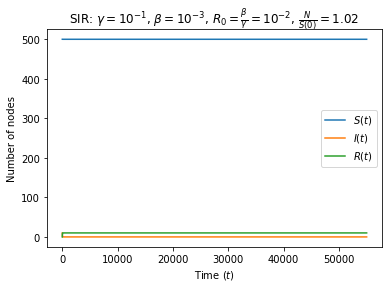

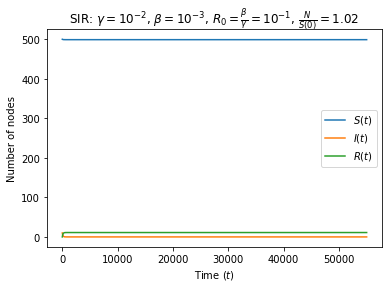

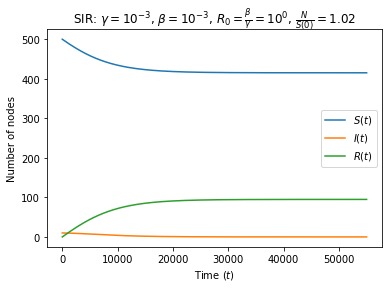

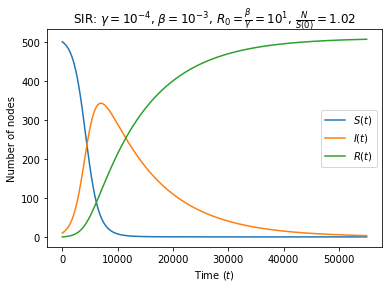

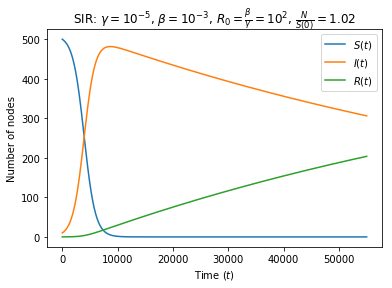

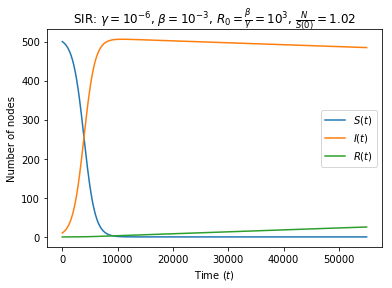

In [165]:
for g in range(1,7):
    solve_SIR(g)

My way


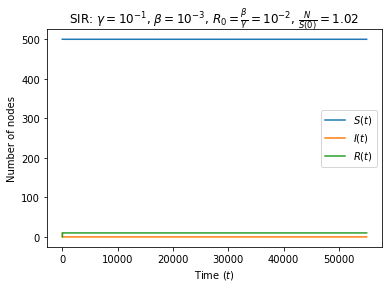

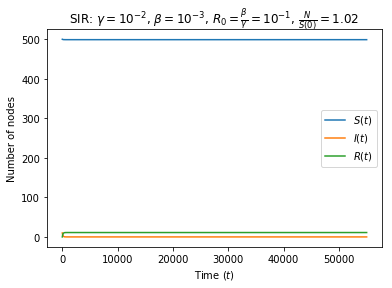

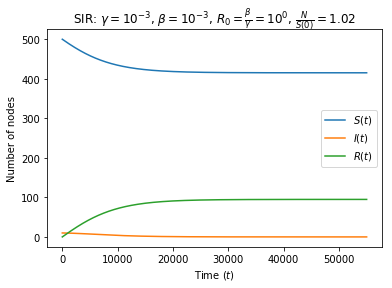

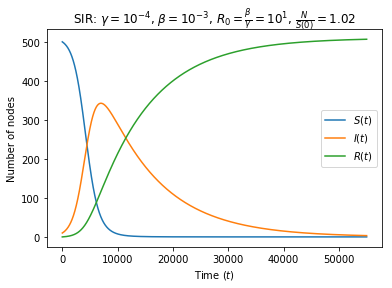

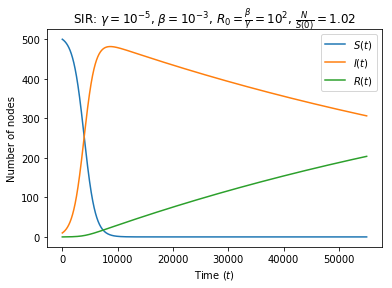

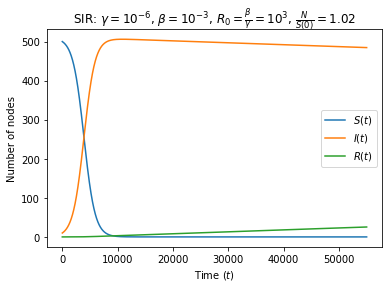

In [166]:
# My way
print("My way")
for g in range(1,7):
    solve_SIR_mine(g)

#### Σχολιασμός SIR

Βασικός ρυθμός αναπαραγωγής $R_0 = \frac{\beta}{\gamma}$.

Όταν $R_0 < \frac{N}{S(0)}$ παρατηρούμε ότι το outbreak τείνει προς την εξαφάνιση αφού: $\dfrac{dI}{dt} (0) <0$, και με αυτό τον τρόπο, το $I(t)$ θα φθίνει διαρκώς. Έτσι, ο αριθμός των Susceptible κόμβων τείνει σε έναν αριθμό διάφορο του μηδενός και ο αριθμός των Recovered κόμβων σε έναν αριθμό διάφορο του $N$. 

Αντίθετα, για $R_0 > \frac{N}{S(0)}$ ο αριθμός των Infected κόμβων αυξάνεται μέχρι μια μέγιστη τιμή και στη συνέχεια φθίνει τείνοντας στο μηδέν (αυτό γίνεται γιατί ο ρυθμός αύξησης του $I$ είναι ανάλογος του $S$, όμως το $S$ μειώνεται όσο περισσότεροι κόμβοι γίνονται Infected, άρα το $I$ πάντα θα φτάνει σε μια ολική μέγιστη τιμή ανάλογα με το πόσο γρήγορα οι κόμβοι από Susceptible γίνοται Infected και το πόσο αργά από Infected γίνοται Recovered). Σε αυτή την περίπτωση, ο αριθμός των Susceptible κόμβων τείνει στο μηδέν, ενώ των Recovered στο $N$. Το γεγονός αυτό σημαίνει ότι για πολύ μεγάλους χρόνους, όπου το σύστημα θα είναι σε ισορροπία, όλοι οι κόμβοι θα έχουν περάσει από την κατάσταση Infected και θα έχουν μεταβεί στην κατάσταση Recovered, κάτι που δεν ισχύει στην προηγούμενη περίπτωση όπως εξηγήσαμε.

Επίσης, παρατηρώντας τις διαφορικές εξισώσεις, καθώς το $\beta$ είναι ανάλογο του ρυθμού μείωσης του $R$ και αύξησης του $I$, όσο αυξάνεται το $\beta$ περιμένουμε το $R$ να μειώνεται γρηγορότερα, ενώ το $I$ να αυξάνεται γρηγορότερα, κάτι που επαληθεύεται από τα διαγράμματα.
















#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

In [177]:
def solve_SIS(a):
    N = 1
    I0 = 0.85 # I0 = 85% of total population N is infected at t=0.
    beta0 = 0.2  # beta(t) = 2 - 1.8*np.cos(5*t)
    
    t = np.linspace(0, 4, 200)

    # The SIS model differential equations.
    def SISderiv(y, t, N, a):
        I, beta = y
        betadt = 1.8*5 * np.sin(5*t)
        dIdt = ( beta*N - a )*I - beta*I**2        
        return dIdt, betadt

    # Initial conditions vector
    y0 = I0, beta0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(SISderiv, y0, t, args=(N,a))
    I, beta = ret.T
    
    plotval = [t, I, beta]
    return(plotval)


Θα παρουσιάσουμε τα $I(t)$ σε ξεχωριστά διαγράμματα για κάθε συνδυασμό τιμών, μαζί με το $\beta(t)$. 

Σημείωση: Βάλαμε $I(0) = 0.85$ για καλύτερη οπτικοποίηση των αποτελεσμάτων. Και για τιμές  $I(0) = 0.05$ (που είναι πιο φυσιολογικές) παίρνουμε παρόμοια αποτελέσματα.

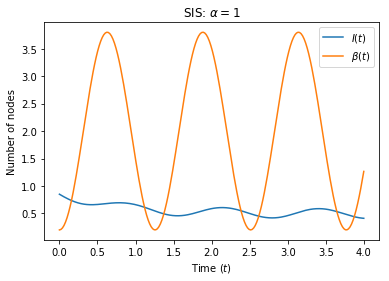

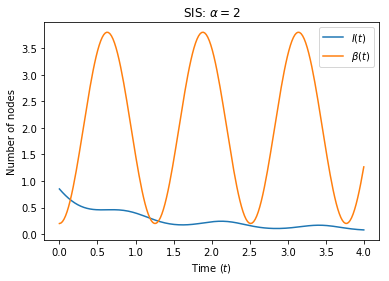

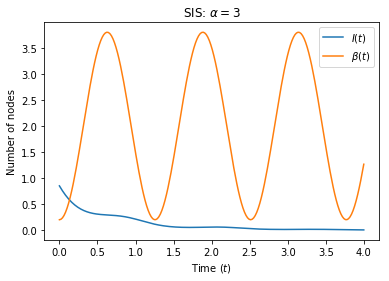

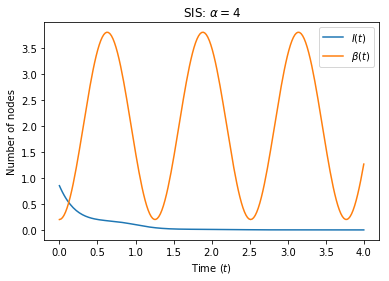

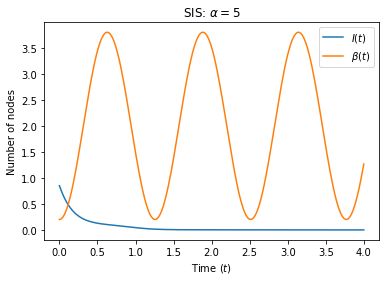

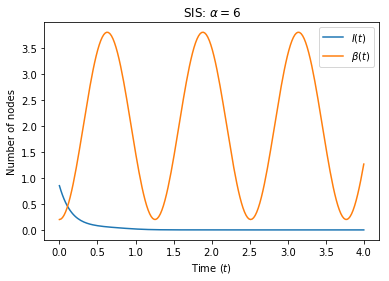

In [178]:
# Seperate plots
for a in range(1,7):
    res = solve_SIS(a)
    time = res[0]
    I = res[1]
    beta_values = res[2]
    plt.plot(time, I, label='$I(t)$')
    plt.plot(time, beta_values, label=r'$\beta (t)$')
    plt.legend(loc='best')
    plt.title(r"SIS: $\alpha = %d $" %a )
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
    plt.show()

Θα παρουσιάσουμε τα $I(t)$ σε κοινό διάγραμμα για όλους τους συνδυασμούς τιμών (τώρα δεν βάζουμε το $\beta(t)$ για να φαίνονται καλύτερα οι διαφορές ανάμεστα στα  $I(t)$).

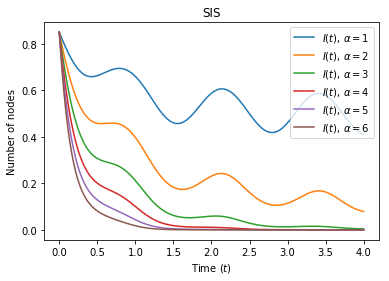

In [179]:
# Same plot
for a in range(1,7):
    res = solve_SIS(a)
    time = res[0]
    I = res[1]
    beta_values = res[2]
    plt.plot(time, I, label=r'$I(t)$, $\alpha = %d$' %a)
#     plt.plot(time, beta_values, label=r'$\beta (t)$, $\alpha = %d$' %a)
    plt.legend(loc='best')
    plt.title(r"SIS")
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
plt.show()

In [180]:
# My way
def solve_SIS_mine(a):
    I0 = 0.85
    N = 1 #population percentage
    
    alpha = a
    time = np.linspace(0, 4, 200) # time points: time = np.linspace(0, 4, 200)
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t)
        return r
    
    # Initialization  
    I_t0 = I0
    dt = time[1]-time[0]
    I = [I0]
    beta_values = [beta(time[0])]
    for t in time:
        I_t1 = I_t0 + dt * ( beta(t) * N - alpha ) * I_t0 - dt * beta(t) * I_t0**2
        I.append(I_t1)
        beta_values.append(beta(t))
        I_t0 = I_t1
    
    # in order to have the same dimension with time:
    I.pop()
    beta_values.pop()

    plotval = [time, I, beta_values]
    return(plotval)

My way


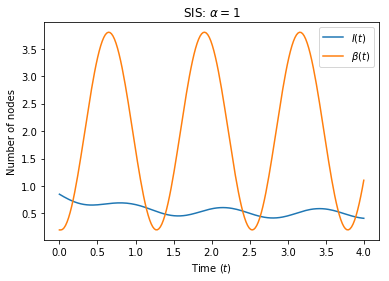

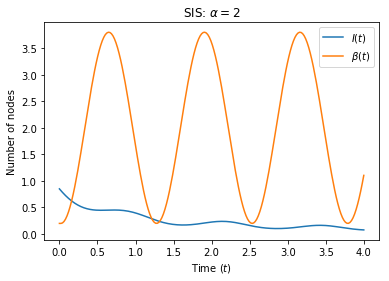

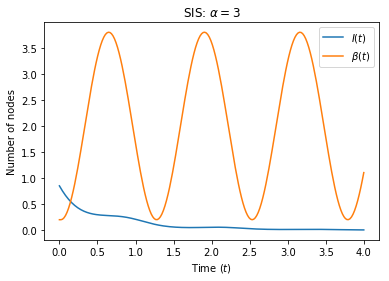

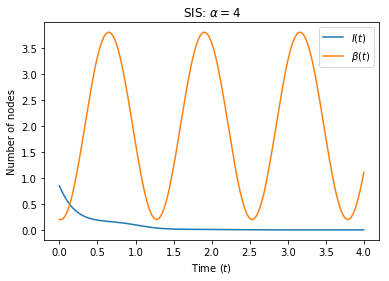

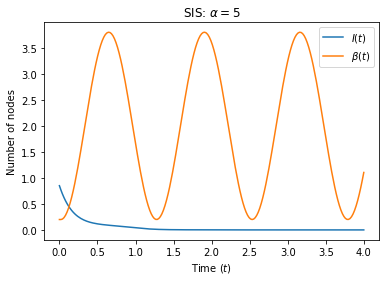

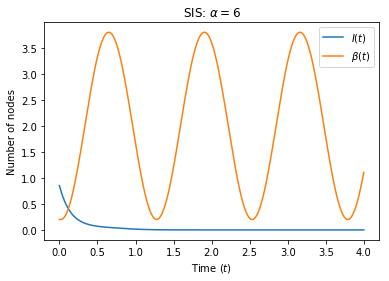

In [181]:
# My way
# Seperate plots
print("My way")
for a in range(1,7):
    res = solve_SIS_mine(a)
    time = res[0]
    I = res[1]
    beta_values = res[2]
    plt.plot(time, I, label='$I(t)$')
    plt.plot(time, beta_values, label=r'$\beta (t)$')
    plt.legend(loc='best')
    plt.title(r"SIS: $\alpha = %d $" %a )
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
    plt.show()

My way


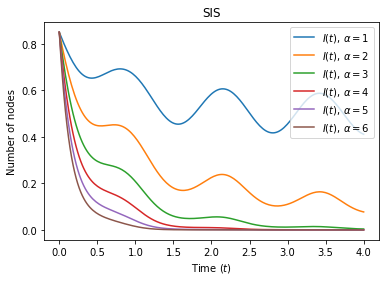

In [182]:
# My way
# Same plot
print("My way")
for a in range(1,7):
    res = solve_SIS_mine(a)
    time = res[0]
    I = res[1]
    beta_values = res[2]
    plt.plot(time, I, label=r'$I(t)$, $\alpha = %d$' %a)
#     plt.plot(time, beta_values, label=r'$\beta (t)$, $\alpha = %d$' %a)
    plt.legend(loc='best')
    plt.title(r"SIS")
    plt.xlabel('Time $(t)$')
    plt.ylabel('Number of nodes')
plt.show()

#### Σχολιασμός SIS
Ισχύουν τα εξής:

- $ \dfrac{dI(t)}{dt} = ( \beta(t)N - \alpha ) I(t) - \beta(t)I^2(t) $

- $\beta(t) = 2 - 1.8 cos(5t)$

- $-1 \leq cos(5t) \leq 1 $

- $N-I(t) \leq 1$

Από τα παραπάνω καταλήγουμε στα:

- το $I(t)$ θα είναι φθίνουσα συνάρτηση του χρόνου όταν 
$\dfrac{dI(t)}{dt} < 0 \forall t \in \mathbb{R}_{\geq0} \Leftrightarrow ... \Leftrightarrow 0<N-I(t)< \dfrac{\alpha}{3.8} $. Όμως $0\leq I(t)\leq N = 1$, άρα το $I(t)$ θα είναι φθίνουσα συνάρτηση του χρόνου $\forall I(t) \in [0,1]$, για $ \alpha >3.8 $ . 

- $\dfrac{dI(t)}{dt} > 0 \forall t \in \mathbb{R}_{\geq0} \Leftrightarrow ... \Leftrightarrow 1 \geq N-I(t) \geq \dfrac{\alpha}{0.2} $. Όμως $I(t)\leq N$, δηλαδή το $I(t)$ θα είναι αύξουσα συνάρτηση του χρόνου όταν $\alpha \leq 0$, που είναι τιμές τις οποίες δεν εξετάζουμε (αν δοκιμάσουμε τέτοιες τιμές θα δούμε ότι πράγματι το $I(t)$ είναι αύξουσα συνάρτηση $\forall t$). 

Πράγματι, από τα διαγράμματα βλέπουμε ότι για $\alpha = \{ 4, 5 ,6 \}$, το $I(t)$ μειώνεται διαρκώς, ενώ για $\alpha = \{ 1, 2, 3 \}$ αυξομειώνεται.

Από τη διαφορική βλέπουμε ότι όσο πιο μεγάλο είναι το $\alpha$, τόσο μεγαλύτερος είναι ο ρυθμός μείωσης του $I(t)$. Για τιμές $\alpha > 3.8$, το $I(t)$ μειώνεται τόσο γρήγορα που η περιοδική αύξηση, που οφείλεται στο $\beta(t)$, δεν επαρκεί με αποτέλεσμα διαρκώς να μειώνεται.